# Assignment 2.
<b>Name: Asad Haroon</b><br>
<b>SP17-BCS-012</b><br>
<b>Section: C</b>

# Titanic Problem
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

<b>Goal: </b>It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

# Importing the Data

In [1]:
import pandas as pd
import numpy as np
titanic_train=pd.read_csv('datasets/train.csv')
titanic_test=pd.read_csv('datasets/test.csv')
print("Setup Complete")

Setup Complete


# 2. Data Understanding

# Train Data

In [2]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Test Data

In [3]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Train Data Information

In [4]:
titanic_train.info()
print("titanic test data total rows are "+str(len(titanic_train)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
titanic test data total rows are 891


In [5]:
# As total Rows in Data are 891. As you can see there are missing rows/data in test data
print("\n Missing Rows Count:")
print((titanic_train.isna().sum()))


 Missing Rows Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Test Data Information

In [6]:
titanic_test.info()
print("titanic test data total rows are "+str(len(titanic_test)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
titanic test data total rows are 418


In [7]:
# As total Rows in Data are 418. As you can see there are missing rows/data in test data
print("\n Missing Rows Count:")
print((titanic_test.isna().sum()))


 Missing Rows Count:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Train Data Statistics

In [8]:
# Train Data Statistics
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Test Data Statistics

In [9]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Train Data Samples

In [10]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Test Data Samples

In [11]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
#Total Train+Test Data Count/Observations are:
print("Total observations are: "+str(len(titanic_train)+len(titanic_test)))

Total observations are: 1309


**VARIABLE DESCRIPTIONS:**

We've got a sense of our variables, their class type, and the first few observations of each. We know we're working with 1309 observations of 12 variables. To make things a bit more explicit since a couple of the variable names aren't 100% illuminating, here's what we've got to deal with:


**Variable Description**

 - Survived: Survived (1) or died (0)
 - Pclass: Passenger's class
 - Name: Passenger's name
 - Sex: Passenger's sex
 - Age: Passenger's age
 - SibSp: Number of siblings/spouses aboard
 - Parch: Number of parents/children aboard
 - Ticket: Ticket number
 - Fare: Fare
 - Cabin: Cabin
 - Embarked: Port of embarkation

In [13]:
def plot_numeric(df,var,target,**kwargs):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4,row = row , col = col)
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
def plot_categorical( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

# 3.Understanding Relationships between features and Survival of Passengers

# With Age

In [14]:
# With Age and Survival
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=10)

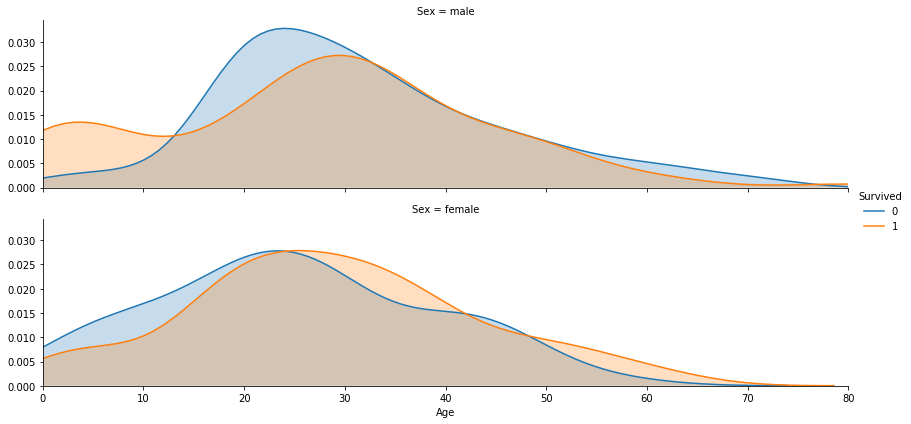

In [15]:
plot_numeric(titanic_train,'Age','Survived',row='Sex')

If two lines meet at same point then it would not be a good variable for predictive model

# With Fare and Survival

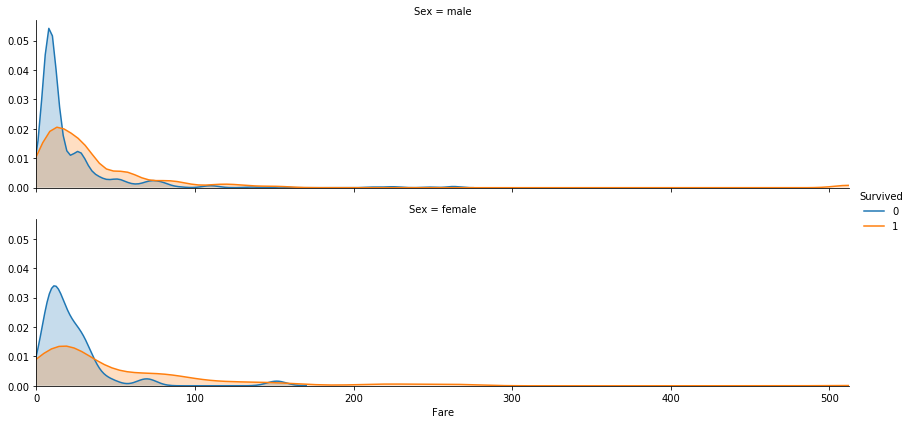

In [16]:
#With Fare and Survival
plot_numeric(df=titanic_train,var='Fare',target='Survived',row='Sex')

# With Pclass and Survival

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


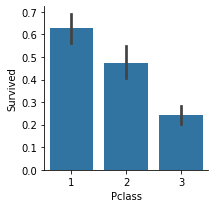

In [17]:
# With PClass and Survival
plot_categorical(df=titanic_train,cat='Pclass',target='Survived')

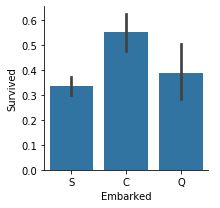

In [18]:
# With Embarked
# Plot survival rate by Embarked
plot_categorical( titanic_train , cat = 'Embarked' , target = 'Survived' )

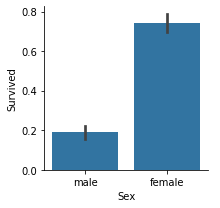

In [19]:
# Plot survival rate by Sex
plot_categorical( titanic_train , cat = 'Sex' , target = 'Survived' )

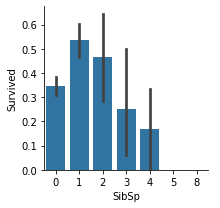

In [20]:
# Plot survival rate by SibSp
plot_categorical( titanic_train , cat = 'SibSp' , target = 'Survived' )

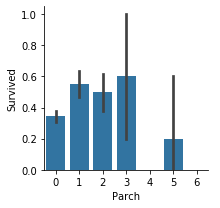

In [21]:
plot_categorical( titanic_train , cat = 'Parch' , target = 'Survived' )

# 4.Prepare Data for Consumption
The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.<br>
The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.<br>
The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable<br>
The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

# Clean Data and Filling Nan Values 

In [22]:
combine=[titanic_train,titanic_test]

In [23]:
for dataset in combine:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.')

In [24]:
titanic_train['Title'].isna().sum()

0

In [25]:
titanic_test['Title'].isna().sum()

0

In [26]:
drop_columns=['PassengerId','Name','Cabin','Ticket']
train_encoded=titanic_train.drop(drop_columns,axis=1)
test_encoded=titanic_test.drop(drop_columns,axis=1)

In [27]:
train_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [28]:
combine=[train_encoded,test_encoded]


In [29]:
train_encoded['Embarked'].isna().sum()

2

# Filling Missing Data

In [30]:
title_mapping={"Mr":1,"Mrs":2,"Miss":2,"Master":3,"Don":4,"Rev":5,"Dr":6,"Mme":7,"Ms":8,"Major":9,"Lady":10,"Sir":11,"Mlle":12,"Col":13,"Capt":14,"Countess":15,"Jonkheer":16}

for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)


In [31]:
freq_port = train_encoded.Embarked.dropna().mode()[0]
freq_port

'S'

In [32]:
freq_port_test = test_encoded.Embarked.dropna().mode()[0]
freq_port_test

'S'

In [33]:
freq_Sex_train = train_encoded.Sex.dropna().mode()[0]
freq_Sex_train

'male'

In [34]:
freq_Sex_test = test_encoded.Sex.dropna().mode()[0]
freq_Sex_test

'male'

In [35]:
freq_Title_test = test_encoded.Title.dropna().mode()[0]
print(freq_Title_test)
test_encoded['Title']=test_encoded['Title'].fillna(freq_Title_test)

1.0


In [36]:
titles=train_encoded['Title'].unique()

In [37]:

train_encoded['Embarked']=train_encoded['Embarked'].fillna(freq_port)
test_encoded['Embarked']=test_encoded['Embarked'].fillna(freq_port_test)
train_encoded['Sex']=train_encoded['Sex'].fillna(freq_Sex_train)
test_encoded['Sex']=test_encoded['Sex'].fillna(freq_Sex_test)

In [38]:
sex_mapping={"male":0,"female":1}
embarked_mapping={"S":1,"Q":2,"C":3}
print(type(sex_mapping))
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

<class 'dict'>


In [39]:
test_encoded['Title'].isna().sum()
train_encoded['Title'].isna().sum()

0

In [40]:
combine=[train_encoded,test_encoded]

In [41]:
train_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,3,2
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,2
4,0,3,0,35.0,0,0,8.0500,1,1


In [42]:
train_encoded['Age'].isna().sum()

177

In [43]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null int64
Title       418 non-null float64
dtypes: float64(3), int64(5)
memory usage: 26.2 KB


In [44]:
import numpy as np
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,1,1
1,1,1,1,38,1,0,71.2833,3,2
2,1,3,1,26,0,0,7.9250,1,2
3,1,1,1,35,1,0,53.1000,1,2
4,0,3,0,35,0,0,8.0500,1,1


In [45]:
for train_data in combine:
    train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
    train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
    train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
    train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
    train_data.loc[ train_data['Age'] > 64, 'Age']=4
#train_data.head(35)

In [46]:
train_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,1,1
1,1,1,1,2,1,0,71.2833,3,2
2,1,3,1,1,0,0,7.9250,1,2
3,1,1,1,2,1,0,53.1000,1,2
4,0,3,0,2,0,0,8.0500,1,1


In [47]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [48]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [49]:
drop_columns1=['FamilySize','Parch','SibSp']

train_encoded=train_encoded.drop(drop_columns1,axis=1)
test_encoded=test_encoded.drop(drop_columns1,axis=1)

In [50]:
train_encoded.Fare.isna().sum()

0

In [51]:
test_encoded.Fare.isna().sum()

1

In [52]:
test_encoded['Fare'].fillna(test_encoded['Fare'].dropna().median(), inplace=True)

In [53]:
test_encoded

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,2,7.8292,2,1.0,1
1,3,1,2,7.0000,1,2.0,0
2,2,0,3,9.6875,2,1.0,1
3,3,0,1,8.6625,1,1.0,1
4,3,1,1,12.2875,1,2.0,0
5,3,0,0,9.2250,1,1.0,1
6,3,1,1,7.6292,2,2.0,1
7,2,0,1,29.0000,1,1.0,0
8,3,1,1,7.2292,3,2.0,1
9,3,0,1,24.1500,1,1.0,0


In [54]:
train_encoded['FareBand'] = pd.qcut(train_encoded['Fare'], 4)
train_encoded[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [55]:
train_encoded.Fare.isna().sum()

0

In [56]:
test_encoded.Fare.isna().sum()

0

In [57]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int32
Fare        418 non-null float64
Embarked    418 non-null int64
Title       418 non-null float64
IsAlone     418 non-null int64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.3 KB


In [58]:
combine=[train_encoded,test_encoded]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_encoded = train_encoded.drop(['FareBand'], axis=1)
combine=[train_encoded,test_encoded]

In [59]:
train_encoded.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone'],
      dtype='object')

In [60]:
combine=[train_encoded,test_encoded]
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_encoded.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


# 5.Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
y=train_encoded['Survived']
X=train_encoded[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title','IsAlone','Age*Class']]
X_train,test_X,Y_train,test_Y=train_test_split(X,y,random_state=0)

# Models

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(test_X)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy is"+str(acc_decision_tree))


Accuracy is86.68


# Linear SVC Model

In [64]:

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(test_X)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.34

In [65]:
from sklearn.metrics import mean_absolute_error

In [66]:
from sklearn.tree import DecisionTreeRegressor

# Improving Error Using Decision Tree Regressor

In [67]:
#Improving Error
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
li=[]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, X_train, test_X, Y_train, test_Y)
    li.append(my_mae)
index=li.index(min(li))
index

3

In [68]:
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = candidate_max_leaf_nodes[index]
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size)

# fit the final model and uncomment the next two lines
final_model.fit(X_train,Y_train)
ae=final_model.predict(test_X)
print(mean_absolute_error(test_Y,ae))

0.23412374588267104


# Random Forest Classifier

In [69]:
X_test=test_X
X=X_train
y=Y_train

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(test_X)
acc=model.score(X_train,Y_train)*100
print("Accuracy is "+str(acc))


Accuracy is 84.58083832335329


In [79]:
full=titanic_train
full = titanic_train.append( titanic_test , ignore_index = True )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


# KNeighbors Classifiers

In [74]:
modelK = KNeighborsClassifier(n_neighbors = 3)
modelK.fit(X_train,Y_train)
ypred=modelK.predict(test_X)
sc=modelK.score(X_train,Y_train)
sc

0.8398203592814372

# Logistic Regression Model

In [77]:
modelLog = LogisticRegression()
modelLog.fit(X_train,Y_train)
ypred=modelLog.predict(test_X)
sc=modelLog.score(X_train,Y_train)
sc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7964071856287425

# 6.Prediction on Test Data

In [78]:
test_Y = decision_tree.predict(test_encoded)
passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_Y } )
test.shape
test.head()
test.to_csv( 'titanic_pred.csv' , index = False )